# CREDIT CARD FRAUD DETECTION
CODECLAUSE INTERNSHIP PROJECT (MAY 2023 BATCH)

BY - SHRUTI KHANDELWAL

### Introduction

Credit card fraud poses a significant threat to individuals and financial institutions worldwide. Detecting fraudulent transactions promptly is crucial to minimize financial losses and protect users.

This project aims to develop an efficient credit card fraud detection system using machine learning techniques in Python. 

The dataset used for this project is sourced from Kaggle, containing a comprehensive collection of credit card transactions, including both fraudulent and non-fraudulent instances.

The primary objective of this project is to train a robust classification model that can accurately distinguish between legitimate and fraudulent credit card transactions. 

By analyzing various transaction features such as amount, time, and anonymized variables, the model will learn to identify patterns and characteristics associated with fraudulent behavior.

##### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Loading dataset

In [2]:
df = pd.read_csv(r'F:\Downloads Projects\CodeClause\CCFD\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Total number of rows and columns
df.shape

(284807, 31)

In [4]:
#Complete dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Checking duplicates

In [5]:
df.duplicated().sum()

1081

In [6]:
#Removing duplicates
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(283726, 31)

In [9]:
#Statistical description of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
#Checking column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
#Let's check fraud and non-fraud transactions in our dataset in % form

Non_fraud = df.Class.value_counts()[0]
fraud = df.Class.value_counts()[1]

print('Non_fraud transaction holds ', round(Non_fraud/len(df)* 100,2), '% of the dataset')
print('fraud transaction holds ', round(fraud/len(df)* 100,2), '% of the dataset')

Non_fraud transaction holds  99.83 % of the dataset
fraud transaction holds  0.17 % of the dataset


Most of the transaction are non-fraud. This also shows imbalanced data.

Text(0.5, 1.0, 'Transactions \n 0: Non-Fraud | 1: Fraud')

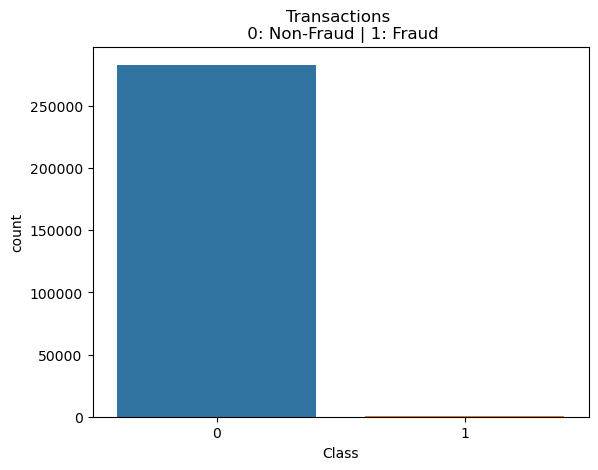

In [12]:
#Let's visualize

sns.countplot(x=df.Class)
plt.title('Transactions \n 0: Non-Fraud | 1: Fraud')

##### Visualizing the distribution of Amount Column

Text(0.5, 1.0, 'Distribution of Amount')

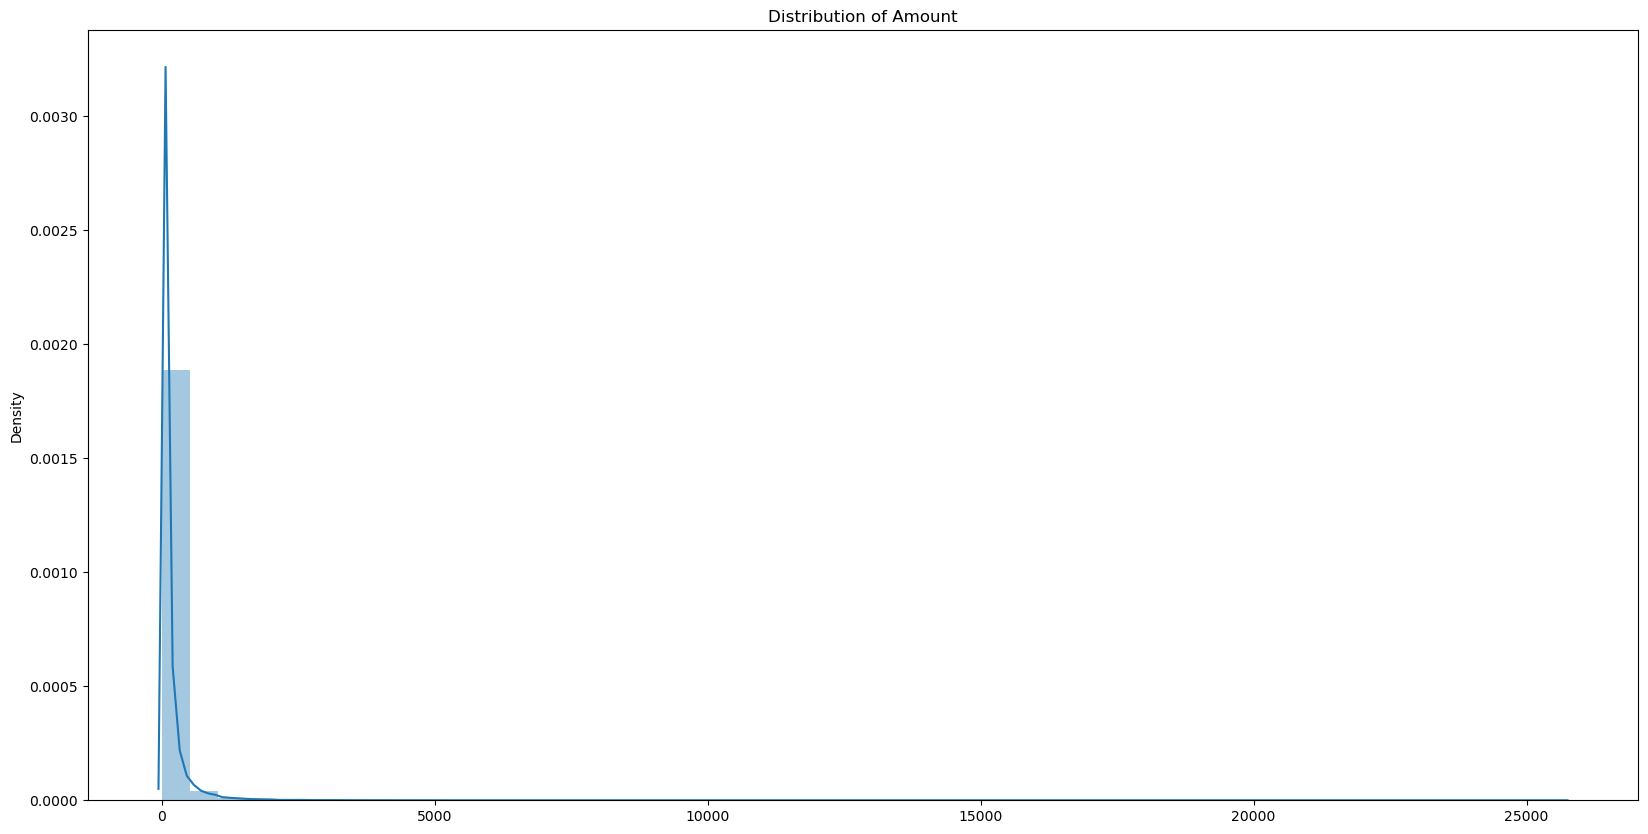

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(df.Amount.values)
plt.title('Distribution of Amount')

##### Visualizing the distribution of Time Column

Text(0.5, 1.0, 'Distribution of Time')

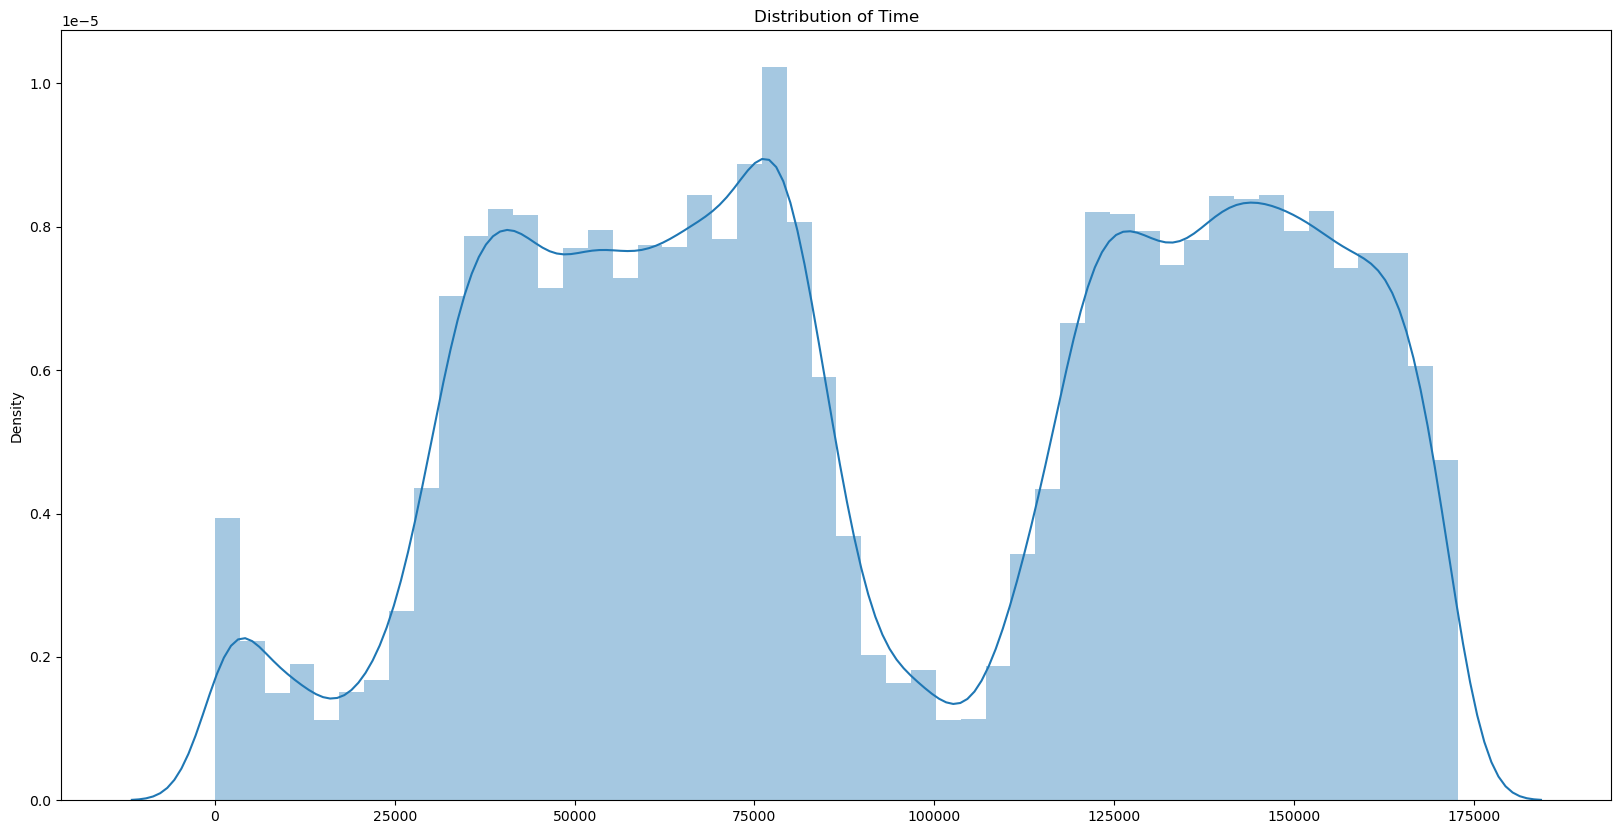

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(df.Time.values)
plt.title('Distribution of Time')

In [15]:
df[['Time','Amount']]

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


As these both columns are not scaled and rest of the columns are already scaled in the dataset. Let's standardize them.

Robust Scaler: The Robust Scaler is more robust to outliers as it uses the median and interquartile range (IQR) to scale the data. It centers the data by subtracting the median and scales it by dividing by the IQR. This makes it less sensitive to extreme values in the dataset.

Robust Scaler: The Robust Scaler uses a non-parametric approach to scale the data, relying on the median and IQR. This makes it suitable for datasets with skewed or non-Gaussian distributions.

Use Robust Scaler when:

The dataset has outliers or extreme values.

The data distribution is skewed or non-Gaussian.

You want to reduce the influence of outliers on the scaling process.


##### Standardizing data using Robust Scaler

In [16]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

df['scaled_time'] = rs.fit_transform(df.Time.values.reshape(-1,1))
df['scaled_amt'] = rs.fit_transform(df.Amount.values.reshape(-1,1))

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_time,scaled_amt
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.995290,1.774718
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.995290,-0.268530
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.995279,4.959811
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.995279,1.411487
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.995267,0.667362


Columns - Time and Amount are scaled now, let's remove unnecessary columns.

In [18]:
df = df.drop(['Time','Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.995290,1.774718
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.995290,-0.268530
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.995279,4.959811
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.995279,1.411487
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.995267,0.667362


As we know that our dataset has imbalanced data consisting of Non_fraud transaction-99.83% and fraud transaction-0.17 %.

let's distribute it equally.

In [19]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amt
423,1.169209,-0.032254,1.011697,1.353641,-0.876062,-0.320567,-0.443364,0.053143,0.868260,-0.154678,...,0.452190,-0.134359,0.407710,0.633324,-0.213844,0.056280,0.028997,0,-0.991683,-0.167292
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,0.992435,5.117508
64460,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,-5.927359,...,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,1,-0.394126,1.084550
234574,-1.053840,4.362801,-6.023534,5.304534,1.480738,-2.193821,-1.530817,0.626857,-4.037021,-6.285424,...,-0.945402,-0.376138,-0.220480,0.264003,0.048935,0.847220,0.531932,1,0.744307,-0.305938
15751,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,-8.372753,...,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1,-0.675794,1.084550


Distribution of the Classes in the  dataset
0    0.509845
1    0.490155
Name: Class, dtype: float64


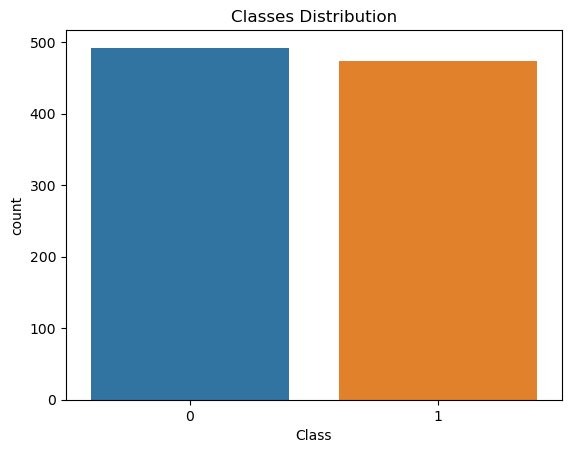

In [20]:
print('Distribution of the Classes in the  dataset')
print(new_df['Class'].value_counts()/len(new_df))

#Visualization

sns.countplot(x=new_df.Class)
plt.title('Classes Distribution')
plt.show()

##### MODEL DEVELOPMENT

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [22]:
X = new_df.drop('Class', axis=1).values
y = new_df['Class'].values

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    }

In [25]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of 97.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 94.0 % accuracy score


In [26]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)


# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)

print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')



Logistic Regression Cross Validation Score:  98.97%


In [27]:
#Knears Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

knears_neighbors = grid_knears.best_estimator_



knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 95.46%


#### MODEL EVALUATION

In [28]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [29]:
y_pred = log_reg.predict(X_test)

In [30]:
scores = []

print(accuracy_score(y_test , y_pred))
scores.append(accuracy_score(y_test , y_pred)*100)

0.9792746113989638


In [31]:
print(recall_score(y_test , y_pred))

0.979381443298969


In [32]:
print("The model used is Logistic Regression")
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))


The model used is Logistic Regression
The accuracy is 0.9792746113989638
The precision is 0.979381443298969
The recall is 0.979381443298969
The F1-Score is 0.979381443298969


In [33]:
print(confusion_matrix(y_test , y_pred))

[[94  2]
 [ 2 95]]


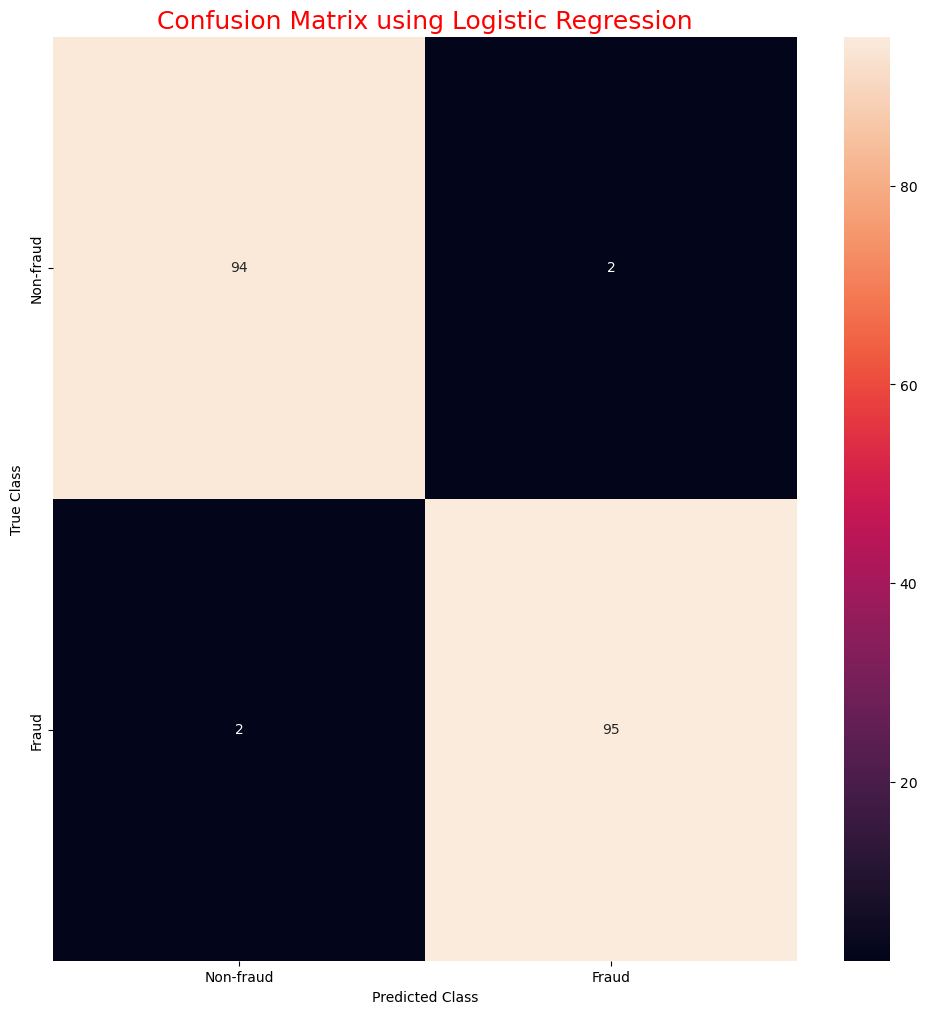

In [34]:
#confusion matrix using logistic regression
LABELS = ['Non-fraud','Fraud']
conf_matrix = confusion_matrix(y_test , y_pred)
plt.figure(figsize = (12,12))
f = sns.heatmap(conf_matrix , xticklabels = LABELS , yticklabels = LABELS , annot=True)
f.set_title("Confusion Matrix using Logistic Regression" , color = "Red" , size = 18)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [35]:
print("Classification Report : ")
print(classification_report(y_test , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        96
           1       0.98      0.98      0.98        97

    accuracy                           0.98       193
   macro avg       0.98      0.98      0.98       193
weighted avg       0.98      0.98      0.98       193

